In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold

In [54]:
df = pd.read_csv('train_upd.csv')
train_copy = df.copy()

In [55]:
df.head()

,cell_name,4G_rat,par_year,par_month,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,2018,12,15,0,50,152,315,59012,...,10,33,46,39,103,69,6,2,ERICSSON,4G_BACKHAUL_CONGESTION
1,4826375369,1,2018,12,7,20,5,54,1871,334,...,22,20,7,10,21,93,7,5,NOKIA,NC
2,3607540856,1,2018,12,5,16,35,277,887,945,...,14,91,49,147,159,77,6,3,ERICSSON,3G_BACKHAUL_CONGESTION
3,1245076813,0,2018,12,16,21,60,51,8577,494,...,10,63,42,75,35,95,7,2,HUAWEI,3G_BACKHAUL_CONGESTION
4,404129745,1,2018,12,4,6,60,117,2084,1056,...,67,59,91,197,316,112,3,5,HUAWEI,4G_RAN_CONGESTION


C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


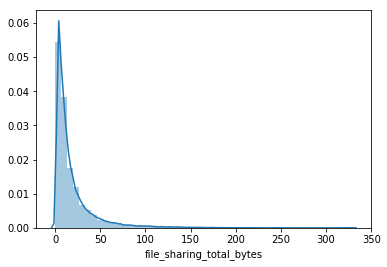

In [56]:
sns.distplot(df['file_sharing_total_bytes'])
plt.savefig('Skewed')

In [57]:
cols=['subscriber_count', 'web_browsing_total_bytes',
       'video_total_bytes', 'social_ntwrking_bytes',
       'cloud_computing_total_bytes', 'web_security_total_bytes',
       'gaming_total_bytes', 'health_total_bytes', 'communication_total_bytes',
       'file_sharing_total_bytes', 'remote_access_total_bytes',
       'photo_sharing_total_bytes', 'software_dwnld_total_bytes',
       'marketplace_total_bytes', 'storage_services_total_bytes',
       'audio_total_bytes', 'location_services_total_bytes',
       'presence_total_bytes', 'advertisement_total_bytes',
       'system_total_bytes', 'voip_total_bytes', 'speedtest_total_bytes',
       'email_total_bytes', 'weather_total_bytes', 'media_total_bytes',
       'mms_total_bytes', 'others_total_bytes']

In [58]:
for each in cols:
    df[each]=np.log(df[each]+1)

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


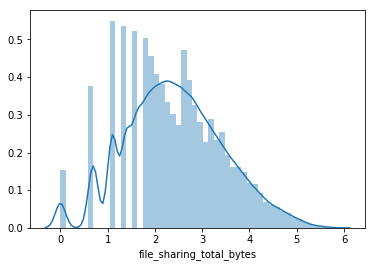

In [59]:
sns.distplot(df['file_sharing_total_bytes'])
plt.savefig('Transformed')

In [60]:
lb1=LabelEncoder()
df['ran_vendor']=lb1.fit_transform(df['ran_vendor'])

In [61]:
lb2=LabelEncoder()
df['Congestion_Type']=lb2.fit_transform(df['Congestion_Type'])

In [62]:
del df['par_year']
del df['par_month']

In [63]:
df.head()

,cell_name,4G_rat,par_day,par_hour,par_min,subscriber_count,web_browsing_total_bytes,video_total_bytes,social_ntwrking_bytes,cloud_computing_total_bytes,...,email_total_bytes,weather_total_bytes,media_total_bytes,mms_total_bytes,others_total_bytes,beam_direction,cell_range,tilt,ran_vendor,Congestion_Type
0,1090595862,1,15,0,50,5.030438,5.755742,10.985513,7.726213,6.942157,...,2.397895,3.526361,3.850148,3.688879,4.644391,69,6,2,0,1
1,4826375369,1,7,20,5,4.007333,7.534763,5.814131,8.418698,4.158883,...,3.135494,3.044522,2.079442,2.397895,3.091042,93,7,5,2,3
2,3607540856,1,5,16,35,5.627621,6.788972,6.852243,10.075506,5.147494,...,2.708050,4.521789,3.912023,4.997212,5.075174,77,6,3,0,0
3,1245076813,0,16,21,60,3.951244,9.056956,6.204558,8.981807,4.204693,...,2.397895,4.158883,3.761200,4.330733,3.583519,95,7,2,1,0
4,404129745,1,4,6,60,4.770685,7.642524,6.963190,8.888067,5.451038,...,4.219508,4.094345,4.521789,5.288267,5.758902,112,3,5,1,2


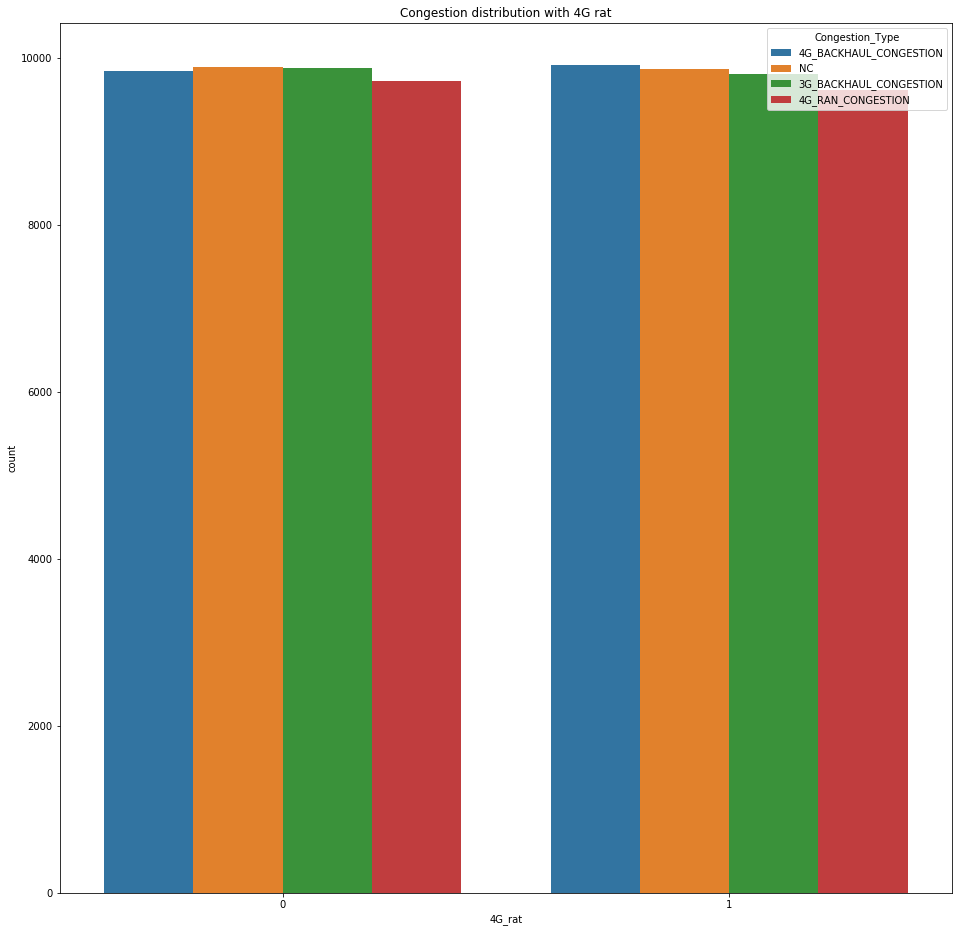

In [64]:
plt.figure(figsize = (16,16))
sns.countplot(data=train_copy, hue='Congestion_Type', x='4G_rat')
plt.title('Congestion distribution with 4G rat')
plt.savefig('4g_rat.jpg')

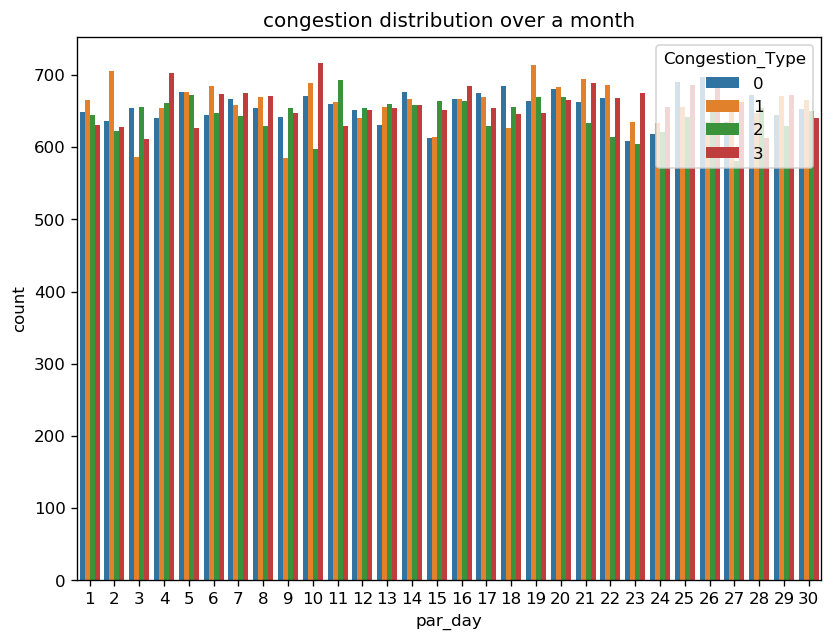

In [65]:
plt.figure(figsize=(8,6),dpi =120)
plt.title('congestion distribution over a month')
sns.countplot(data=df, x='par_day', hue='Congestion_Type')
plt.savefig('month.jpg')

In [66]:
df['Congestion_Type']=lb2.inverse_transform(df['Congestion_Type'])

C:\Users\Amartya Sen\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0,0.5,'Number of Occurrences')

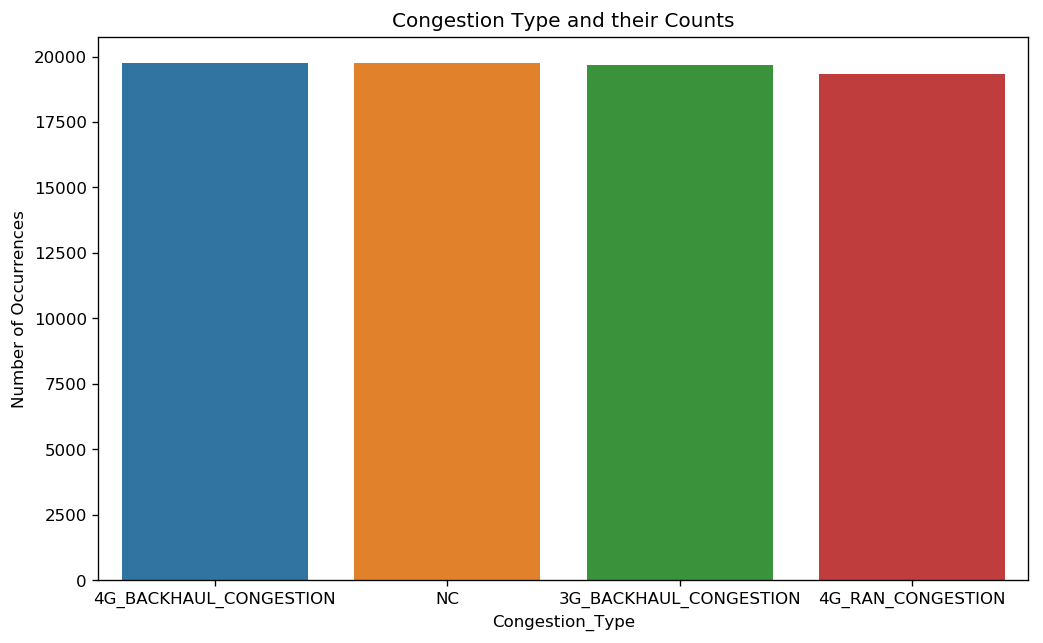

In [75]:

plt.figure(figsize=(10,6),dpi=120)
sns.countplot(data=df, x='Congestion_Type')
plt.title('Congestion Type and their Counts')
plt.ylabel('Number of Occurrences')

In [76]:
df['ran_vendor']=lb1.inverse_transform(df['ran_vendor'])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
plt.figure(figsize=(6,6), dpi=120)
sns.countplot(data=df, x='ran_vendor')
plt.title('RAN vendors')

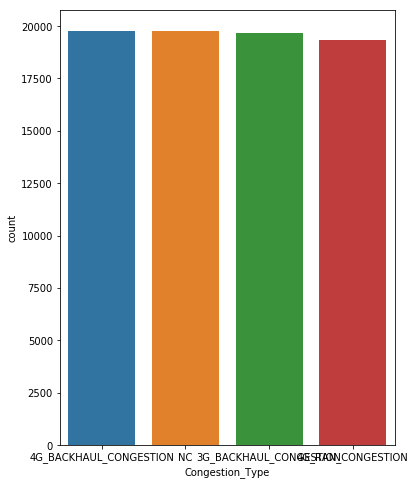

In [77]:
plt.figure(figsize = (6,8))
sns.countplot(train_copy['Congestion_Type'])
plt.savefig('Count_vs_CongestionType')

In [78]:
x_2 = df.loc[df['Congestion_Type']==2]
x_3 = df.loc[df['Congestion_Type']==3]
x_0 = df.loc[df['Congestion_Type']==0]
x_1 = df.loc[df['Congestion_Type']==1]

In [79]:
rtf = x_2.append(x_0)

In [80]:
plt.figure(figsize=(24,16))
corr = rtf.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.savefig('Correlation_between_2_0')

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1728x1152 with 0 Axes>

In [81]:
xx_2 = train_copy.loc[train_copy['Congestion_Type']=='4G_BACKHAUL_CONGESTION']
xx_3 = train_copy.loc[train_copy['Congestion_Type']=='NC']
xx_0 = train_copy.loc[train_copy['Congestion_Type']=='3G_BACKHAUL_CONGESTION']
xx_1 = train_copy.loc[train_copy['Congestion_Type']=='4G_RAN_CONGESTION']

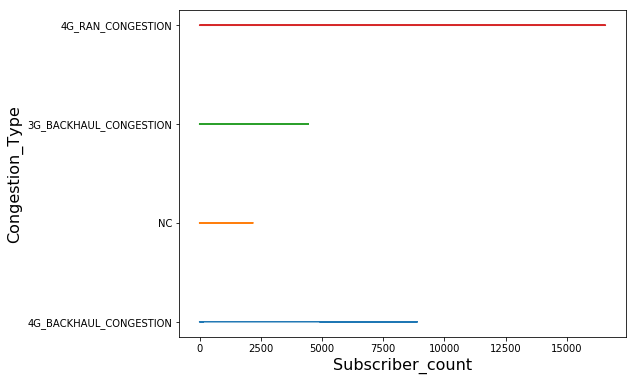

In [84]:
plt.figure(figsize=(8,6))
plt.plot(xx_2['subscriber_count'],xx_2['Congestion_Type'])
plt.plot(xx_3['subscriber_count'],xx_3['Congestion_Type'])
plt.plot(xx_0['subscriber_count'],xx_0['Congestion_Type'])
plt.plot(xx_1['subscriber_count'],xx_1['Congestion_Type'])
plt.xlabel('Subscriber_count',fontsize=16)
plt.ylabel('Congestion_Type',fontsize=16)
plt.savefig('Subscriber_count_Congestion_Type')